# <a id="0">Classification of Quality of Bananas</a>

Using the banna quality data set __banana_quality.csv__ provided in the folder. 

__Dataset schema:__ 
   - Size - size of fruit
   - Weight - weight of fruit
   - Sweetness - sweetness of fruit
   - Softness - softness of fruit
   - HarvestTime - amount of time passed from harvesting of the fruit
   - Ripeness - ripness of fruit
   - Acidity - acidity of fruit
   

   Output variable: 
   - Quality - quality of fruit


### Exploratory Data Analysis and Feature Engineering ###

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
  
df = pd.read_csv('/kaggle/input/banana/banana_quality.csv')

__Number of rows, columns and some simple statistics of the dataset using [df.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


__Create Categorical Feature 'Ripness Class'based on Ripness factor. This new column will be used as the target Variable

In [3]:
Ripness_labels = ['Green', 'Yellowish Green', 'Mid-Rippen', 'Over-Rippen']
df['Ripness Class'] = pd.qcut(df['Ripeness'], q=4, labels=Ripness_labels)
df['Ripness Class'].value_counts()

Ripness Class
Green              2000
Yellowish Green    2000
Mid-Rippen         2000
Over-Rippen        2000
Name: count, dtype: int64

__Drop the Ripness column

In [4]:
df = df.drop('Ripeness', axis =1)

__Create Model features and target variable

In [5]:
model_features = df.columns.drop('Quality')
model_target = 'Quality'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Acidity',
       'Ripness Class'],
      dtype='object')
Model target:  Quality


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Size           8000 non-null   float64 
 1   Weight         8000 non-null   float64 
 2   Sweetness      8000 non-null   float64 
 3   Softness       8000 non-null   float64 
 4   HarvestTime    8000 non-null   float64 
 5   Acidity        8000 non-null   float64 
 6   Quality        8000 non-null   object  
 7   Ripness Class  8000 non-null   category
dtypes: category(1), float64(6), object(1)
memory usage: 445.6+ KB


In [7]:
import numpy as np
numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features_all)

print('')

categorical_features_all = df[model_features].select_dtypes(include='category').columns
print('Categorical columns:',categorical_features_all)


Numerical columns: Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Acidity'], dtype='object')

Categorical columns: Index(['Ripness Class'], dtype='object')


__Plot bar plot for a categorical feature quality

Ripness Class  
Green              2000
Yellowish Green    2000
Mid-Rippen         2000
Over-Rippen        2000
Name: count, dtype: int64



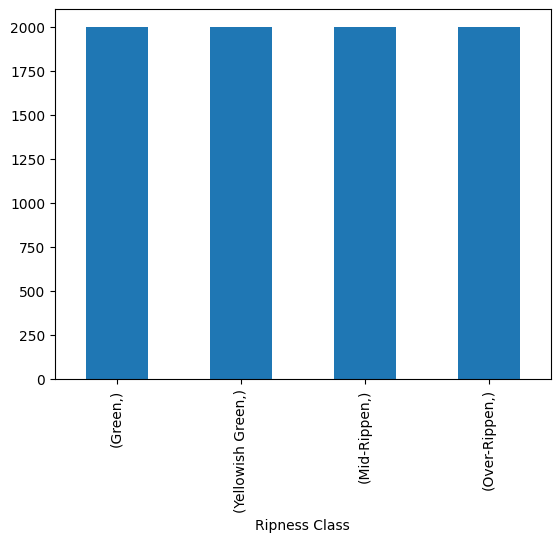

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
print(df[categorical_features_all].value_counts())

print('')

df[categorical_features_all].value_counts().plot.bar()
plt.show()

__Plot histogram

Size


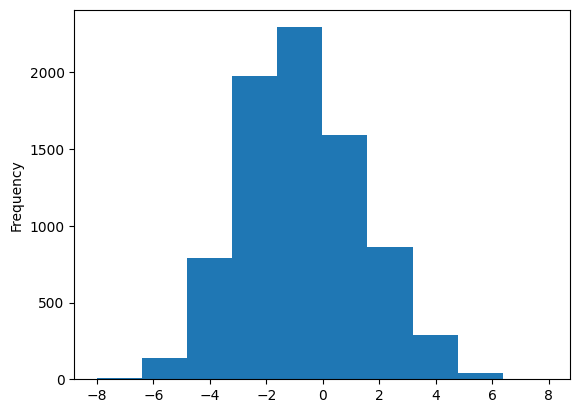

Weight


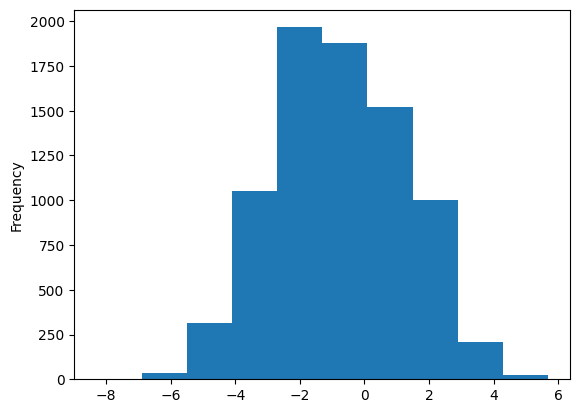

Sweetness


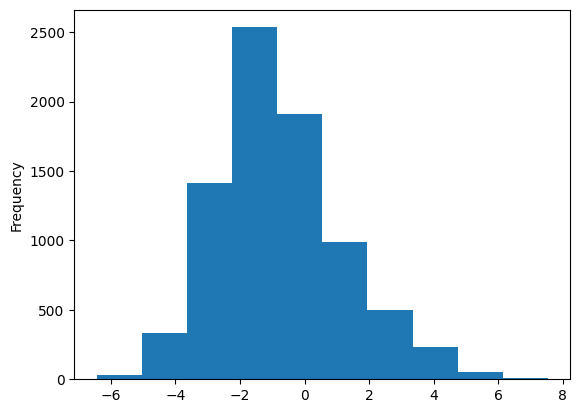

Softness


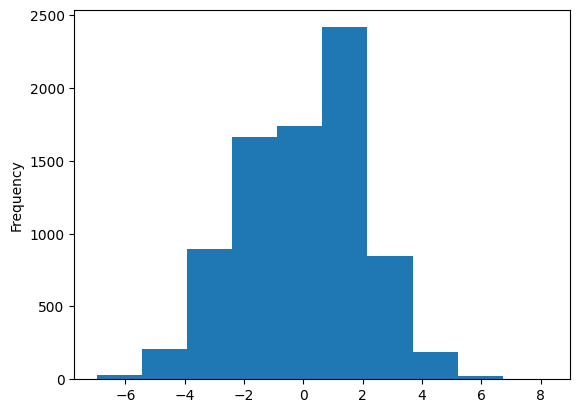

HarvestTime


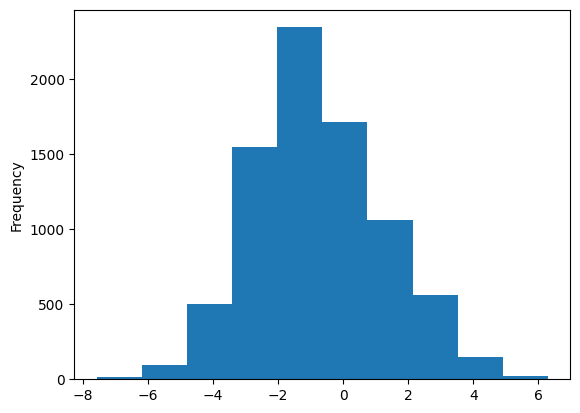

Acidity


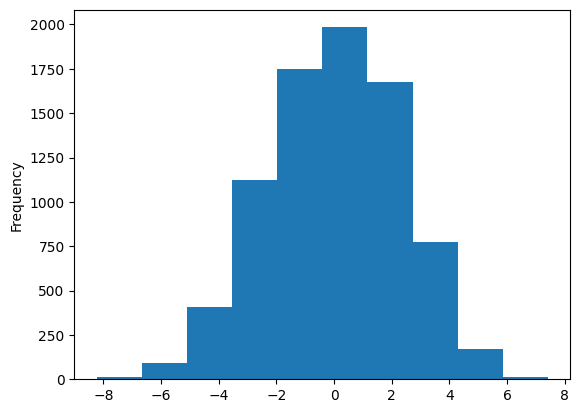

In [9]:
for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=10)
    plt.show()

__Plot heat map

In [10]:
df[numerical_features_all].corr().style.background_gradient(cmap='coolwarm')

,Size,Weight,Sweetness,Softness,HarvestTime,Acidity
Size,1.000000,-0.181933,-0.258027,0.164526,0.582014,-0.140673
Weight,-0.181933,1.000000,0.422683,-0.189908,-0.079465,0.443879
Sweetness,-0.258027,0.422683,1.000000,-0.095338,-0.201657,0.187059
Softness,0.164526,-0.189908,-0.095338,1.000000,0.194734,-0.146014
HarvestTime,0.582014,-0.079465,-0.201657,0.194734,1.000000,-0.090903
Acidity,-0.140673,0.443879,0.187059,-0.146014,-0.090903,1.000000


## Data Preparation

__Split the train and test data

In [11]:
from sklearn.model_selection import train_test_split


train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)


__Target Balancing

In [12]:
print('Training set shape:', train_data.shape)

print('Class 1 samples in the test set:', sum(test_data[model_target] == 'Good'))
print('Class 2 samples in the test set:', sum(test_data[model_target] == 'Bad'))


print('')

print('Test set shape:', test_data.shape)

print('Class 1 samples in the test set:', sum(test_data[model_target] == 'Good'))
print('Class 2 samples in the test set:', sum(test_data[model_target] == 'Bad'))



Training set shape: (5600, 8)
Class 1 samples in the test set: 1246
Class 2 samples in the test set: 1154

Test set shape: (2400, 8)
Class 1 samples in the test set: 1246
Class 2 samples in the test set: 1154


## Pipeline for data processing ##

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Preprocess the numerical features
numerical_processor = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('num_scaler', MinMaxScaler()) # Shown in case is needed, not a must with Decision Trees
])
                  
# Preprocess the categorical features
categorical_processor = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Shown in case is needed, no effect here as we already imputed with 'nan' strings
    ('cat_encoder', OneHotEncoder()) # handle_unknown tells it to ignore (rather than throw an error for) any value that was not present in the initial training set.
])


In [14]:

data_preprocessor = ColumnTransformer([
    ('numerical_pre', numerical_processor, numerical_features_all),
    ('categorical_pre', categorical_processor, categorical_features_all)
]) 

___Multiple Models using Pipeline

In [15]:

pipelines = []
pipelines.append(('scaledLR' , (Pipeline([('data_preprocessing', data_preprocessor),('LR' ,LogisticRegression())]))))
pipelines.append(('scaledKNN' , (Pipeline([('data_preprocessing', data_preprocessor),('KNN' ,KNeighborsClassifier())]))))
pipelines.append(('scaledDT' , (Pipeline([('data_preprocessing', data_preprocessor),('DT' ,DecisionTreeClassifier())]))))
pipelines.append(('scaledRF' , (Pipeline([('data_preprocessing', data_preprocessor),('RF' ,RandomForestClassifier())]))))



In [16]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt
X_train = train_data[model_features]
y_train = train_data[model_target]

for pipe ,model in pipelines:
    model.fit(X_train, y_train)
    print('*'*50)
    print('Model Name: ' , pipe)
    
    print('')
    
    train_predictions = model.predict(X_train)
    print(confusion_matrix(y_train, train_predictions))
    print(classification_report(y_train, train_predictions))
    print("Accuracy (training):", accuracy_score(y_train, train_predictions))

    # Get test data to test the pipeline
    X_test = test_data[model_features]
    y_test = test_data[model_target]

    # Use the fitted pipeline to make predictions on the test dataset
    test_predictions = model.predict(X_test)
    print(confusion_matrix(y_test, test_predictions))
    print(classification_report(y_test, test_predictions))
    print("Accuracy (test):", accuracy_score(y_test, test_predictions))
    print('')

**************************************************
Model Name:  scaledLR

[[2477  363]
 [ 342 2418]]
              precision    recall  f1-score   support

         Bad       0.88      0.87      0.88      2840
        Good       0.87      0.88      0.87      2760

    accuracy                           0.87      5600
   macro avg       0.87      0.87      0.87      5600
weighted avg       0.87      0.87      0.87      5600

Accuracy (training): 0.8741071428571429
[[1002  152]
 [ 133 1113]]
              precision    recall  f1-score   support

         Bad       0.88      0.87      0.88      1154
        Good       0.88      0.89      0.89      1246

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400

Accuracy (test): 0.88125

**************************************************
Model Name:  scaledKNN

[[2801   39]
 [  58 2702]]
              precision    recall  f1-score   supp



## Grid Serach for tune the hyper-parameter for the Multiple classifier. ##

       

In [17]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]

lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear']}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[1:]}]

knn_param_grid = [{'KNN__n_neighbors': param_range,
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['euclidean', 'manhattan']}]

rf_param_grid = [{'RF__n_estimators' : [3.4,5],
                  'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]
                 }]



grids = []

for pipe ,model in pipelines:
    if pipe == 'scaledLR':
        lr_grid_search = GridSearchCV(model,
        param_grid=lr_param_grid,
        n_jobs = -1,
        cv=5)
        grids.append(('LR', lr_grid_search))
    if pipe == 'scaledKNN':    
        knn_grid_search = GridSearchCV(model,
        param_grid=knn_param_grid,
        n_jobs = -1,
        cv=5)
        grids.append(('KNN',knn_grid_search))
    if pipe == 'scaledDT':        
        dt_grid_search = GridSearchCV(model,
        param_grid=dt_param_grid,
        n_jobs = -1,
        cv=5)
        grids.append(('DT',dt_grid_search))
    if pipe == 'scaledRF':      
        rf_grid_search = GridSearchCV(model,
        param_grid=rf_param_grid,
        n_jobs = -1,
        cv=5)
        grids.append(('RF',rf_grid_search))
        

        

In [18]:

for model, pipe in grids:
    pipe.fit(X_train,y_train)

**************************************************
Model Name:  LR

[[2482  358]
 [ 340 2420]]
              precision    recall  f1-score   support

         Bad       0.88      0.87      0.88      2840
        Good       0.87      0.88      0.87      2760

    accuracy                           0.88      5600
   macro avg       0.88      0.88      0.88      5600
weighted avg       0.88      0.88      0.88      5600

Accuracy (training): 0.8753571428571428
**************************************************
Model Name:  KNN

[[2840    0]
 [   0 2760]]
              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00      2840
        Good       1.00      1.00      1.00      2760

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600

Accuracy (training): 1.0
**************************************************
Model Name:  DT

[[2641  199]
 [ 188 25

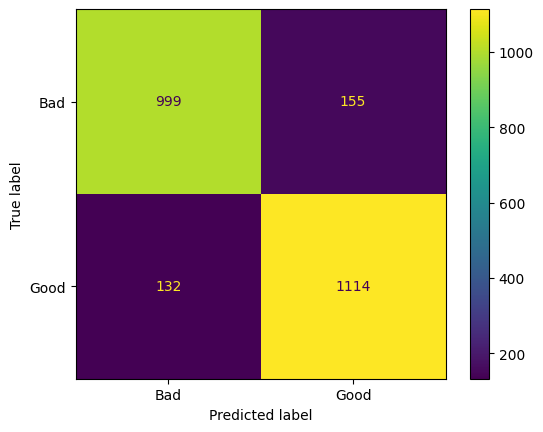

              precision    recall  f1-score   support

         Bad       0.88      0.87      0.87      1154
        Good       0.88      0.89      0.89      1246

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400

LR Test Accuracy: 0.8804166666666666
LR Best Params: {'LR__C': 0.5, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
**************************************************
Model Name:  KNN

[[1124   30]
 [  27 1219]]


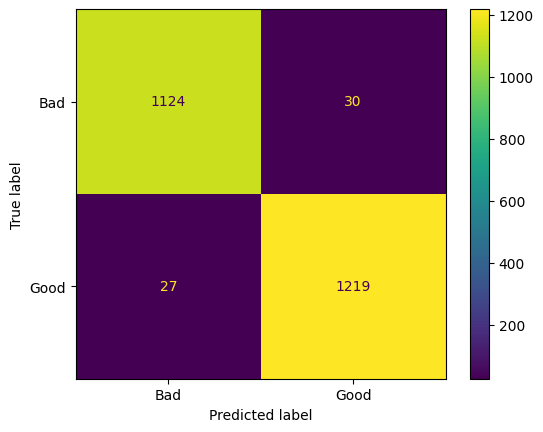

              precision    recall  f1-score   support

         Bad       0.98      0.97      0.98      1154
        Good       0.98      0.98      0.98      1246

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400

KNN Test Accuracy: 0.97625
KNN Best Params: {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5, 'KNN__weights': 'distance'}
**************************************************
Model Name:  DT

[[1037  117]
 [  88 1158]]


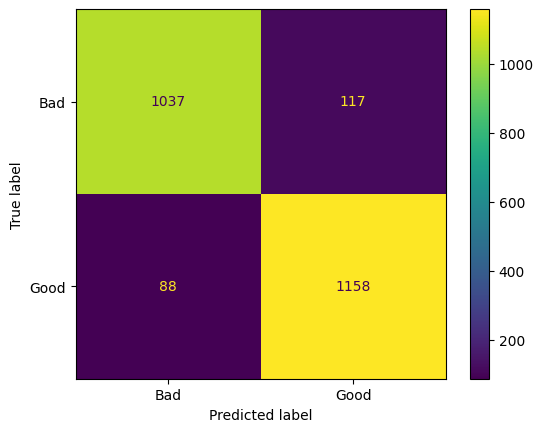

              precision    recall  f1-score   support

         Bad       0.92      0.90      0.91      1154
        Good       0.91      0.93      0.92      1246

    accuracy                           0.91      2400
   macro avg       0.92      0.91      0.91      2400
weighted avg       0.91      0.91      0.91      2400

DT Test Accuracy: 0.9145833333333333
DT Best Params: {'DT__criterion': 'entropy', 'DT__max_depth': 6, 'DT__min_samples_leaf': 3, 'DT__min_samples_split': 2}
**************************************************
Model Name:  RF

[[1083   71]
 [  98 1148]]


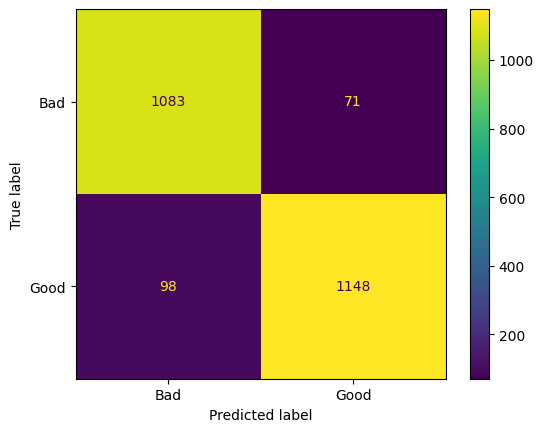

              precision    recall  f1-score   support

         Bad       0.92      0.94      0.93      1154
        Good       0.94      0.92      0.93      1246

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400

RF Test Accuracy: 0.9295833333333333
RF Best Params: {'RF__max_depth': 6, 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 3, 'RF__n_estimators': 5}


In [19]:
# Use the fitted pipeline to make predictions on the train dataset
for model,pipe in grids:
    train_predictions = pipe.predict(X_train)
    print('*'*50)
    print('Model Name: ' , model)
    print('')
    print(confusion_matrix(y_train, train_predictions))
    print(classification_report(y_train, train_predictions))
    print("Accuracy (training):", accuracy_score(y_train, train_predictions))

# Get test data to test the pipeline
X_test = test_data[model_features]
y_test = test_data[model_target]



# Use the fitted pipeline to make predictions on the test dataset
for model, pipe in grids:
    test_predictions = pipe.predict(X_test)
    print('*'*50)
    print('Model Name: ' , model)
    print('')
    print(confusion_matrix(y_test, test_predictions,labels=pipe.classes_))
    disp = ConfusionMatrixDisplay(confusion_matrix =confusion_matrix(y_test, test_predictions),display_labels=pipe.classes_)

    disp.plot()

    plt.show()
    print(classification_report(y_test, test_predictions))
    
    print('{} Test Accuracy: {}'.format(model,accuracy_score(y_test, test_predictions)))
    print('{} Best Params: {}'.format(model,pipe.best_params_))

After tuning the models with hyper parameters KNN has the Higher(97%) accuracy for the given test data set as compare to RF,DT,LR. THe list of the hyper parameter of RF as follows,

KNN Best Params: {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5, 'KNN__weights': 'distance'}